In [1]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import glob
os.getcwd()

import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
#from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

import numpy as np
import keras 
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils import to_categorical
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline


from numpy import genfromtxt

C:\Users\Marakhi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
A = 0
k = 0
for filename in glob.glob('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data localization1\\raw data\\*.JPG'):
    im=cv2.imread(filename)
    x = im.shape
    height = list(range(x[0]))
    height = height[0:x[0]:int((x[0]-1)/4)]
    width = list(range(x[1]))
    width = width[0:x[1]:int((x[1]-1)/3)]
    print("width, height : ",x[0], x[1], width, height)
    for i in range(3):
        for j in range(4):
            crop_img = im[height[j]:height[j+1], width[i]:width[i+1]]
            resize_img = cv2.resize(crop_img, (40,40), interpolation = cv2.INTER_AREA)
            file_name = 'C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data localization1\\data\\'+str(A)+'.jpg'
            cv2.imwrite(file_name, resize_img)
            if k==0:
                x_train=np.expand_dims(resize_img, axis=0)
                k = k+1
            else:
                x_train = np.concatenate((x_train, np.expand_dims(resize_img, axis=0)), axis=0)               
            print(width[i+1],height[j+1])
            A = A+1 


width, height :  2745 2009 [0, 669, 1338, 2007] [0, 686, 1372, 2058, 2744]
669 686
669 1372
669 2058
669 2744
1338 686
1338 1372
1338 2058
1338 2744
2007 686
2007 1372
2007 2058
2007 2744
width, height :  3089 2191 [0, 730, 1460, 2190] [0, 772, 1544, 2316, 3088]
730 772
730 1544
730 2316
730 3088
1460 772
1460 1544
1460 2316
1460 3088
2190 772
2190 1544
2190 2316
2190 3088
width, height :  2761 2001 [0, 666, 1332, 1998] [0, 690, 1380, 2070, 2760]
666 690
666 1380
666 2070
666 2760
1332 690
1332 1380
1332 2070
1332 2760
1998 690
1998 1380
1998 2070
1998 2760
width, height :  3089 2191 [0, 730, 1460, 2190] [0, 772, 1544, 2316, 3088]
730 772
730 1544
730 2316
730 3088
1460 772
1460 1544
1460 2316
1460 3088
2190 772
2190 1544
2190 2316
2190 3088
width, height :  2769 1993 [0, 664, 1328, 1992] [0, 692, 1384, 2076, 2768]
664 692
664 1384
664 2076
664 2768
1328 692
1328 1384
1328 2076
1328 2768
1992 692
1992 1384
1992 2076
1992 2768
width, height :  2641 1977 [0, 658, 1316, 1974] [0, 660, 132

(408, 40, 40, 3)


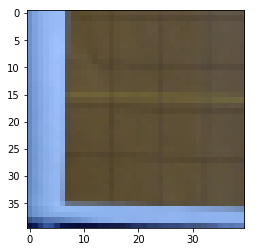

In [3]:
x_train1 = x_train[0:408,...]
print(x_train1.shape)
plt.imshow(x_train1[399])

In [4]:
y_train = genfromtxt('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data localization1\\y_train.csv', delimiter=',')

In [5]:
print(y_train[396])

[0. 0. 0.]


In [6]:
def HappyModel(input_shape):
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((2, 2), name='max_pool0')(X)
    
    X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((2, 2), name='max_pool1')(X)
    
    X = Conv2D(128, (3, 3), strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((2, 2), name='max_pool2')(X)
    
    X = Conv2D(3, (3, 3), strides = (1, 1), name = 'conv3')(X)
    X = MaxPooling2D((2, 2), name='max_pool3')(X)

    Y = Flatten()(X)

    model = Model(inputs = X_input, outputs = Y, name='HappyModel')
    #model = Model(inputs = X_input, outputs = y2, name='HappyModel')

    return model

In [7]:
def my_loss(y_true, y_pred):
    class_loss = tf.reduce_mean((y_true[:,:1]-y_pred[:,:1])**2,)
    cond = tf.equal(tf.squeeze(y_true[:,:1]),1.)
    ind = tf.where(cond)
    val1 = tf.squeeze(tf.gather_nd(y_true[:,1:2],ind))
    val2 = tf.squeeze(tf.gather_nd(y_pred[:,1:2],ind))
    X_loss = tf.reduce_mean((val1-val2)**2,)
    val3 = tf.squeeze(tf.gather_nd(y_true[:,2:3],ind))
    val4 = tf.squeeze(tf.gather_nd(y_pred[:,2:3],ind))
    Y_loss = tf.reduce_mean((val3-val4)**2,)
    loss = class_loss + 5*X_loss + 5*Y_loss
    return loss
    

In [33]:
#happyModel = HappyModel(x_train1.shape[1:])
#happyModel.compile('adam', loss=my_loss)
happyModel.fit(x_train1, y_train, epochs=200, batch_size=32)

Epoch 1/200
408/408 [==============================] - 9s 23ms/step - loss: 0.0272
Epoch 2/200
408/408 [==============================] - 9s 22ms/step - loss: 0.0348
Epoch 3/200
408/408 [==============================] - 9s 22ms/step - loss: 0.0361
Epoch 4/200
408/408 [==============================] - 9s 22ms/step - loss: 0.0204
Epoch 5/200
408/408 [==============================] - 9s 22ms/step - loss: 0.0315
Epoch 6/200
408/408 [==============================] - 9s 22ms/step - loss: 0.0322
Epoch 7/200
408/408 [==============================] - 9s 22ms/step - loss: 0.0331
Epoch 8/200
408/408 [==============================] - 9s 22ms/step - loss: 0.0295
Epoch 9/200
408/408 [==============================] - 9s 22ms/step - loss: 0.0261
Epoch 10/200
408/408 [==============================] - 9s 22ms/step - loss: 0.0235
Epoch 11/200
408/408 [==============================] - 9s 22ms/step - loss: 0.0199
Epoch 12/200
408/408 [==============================] - 9s 22ms/step - loss: 0.0225
E

408/408 [==============================] - 9s 21ms/step - loss: 0.0157
Epoch 99/200
408/408 [==============================] - 9s 21ms/step - loss: 0.0089
Epoch 100/200
408/408 [==============================] - 9s 22ms/step - loss: 0.0107
Epoch 101/200
408/408 [==============================] - 9s 21ms/step - loss: 0.0082
Epoch 102/200
408/408 [==============================] - 9s 21ms/step - loss: 0.0085
Epoch 103/200
408/408 [==============================] - 9s 22ms/step - loss: 0.0092
Epoch 104/200
408/408 [==============================] - 9s 21ms/step - loss: 0.0086
Epoch 105/200
408/408 [==============================] - 9s 21ms/step - loss: 0.0097
Epoch 106/200
408/408 [==============================] - 9s 23ms/step - loss: 0.0121
Epoch 107/200
408/408 [==============================] - 9s 23ms/step - loss: 0.0186
Epoch 108/200
408/408 [==============================] - 9s 21ms/step - loss: 0.0227
Epoch 109/200
408/408 [==============================] - 9s 21ms/step - loss: 0.

Epoch 194/200
408/408 [==============================] - 11s 26ms/step - loss: 0.0057
Epoch 195/200
408/408 [==============================] - 11s 26ms/step - loss: 0.0053
Epoch 196/200
408/408 [==============================] - 12s 28ms/step - loss: 0.0066
Epoch 197/200
408/408 [==============================] - 11s 26ms/step - loss: 0.0101
Epoch 198/200
408/408 [==============================] - 10s 24ms/step - loss: 0.0077
Epoch 199/200
408/408 [==============================] - 10s 24ms/step - loss: 0.0076
Epoch 200/200
408/408 [==============================] - 10s 24ms/step - loss: 0.0089


In [28]:
x = image.img_to_array(x_train[408])
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
#print(y_train[0])
mark_y=happyModel.predict(x)
print(mark_y)

[[0.8146203  0.48836845 0.482537  ]]


In [8]:
XA = np.arange(9).reshape(3,3)
XB = np.arange(9).reshape(3,3)*3
print(XA)
print(XB)
XC = my_loss(XA,XB)
print(XC)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  3  6]
 [ 9 12 15]
 [18 21 24]]
Tensor("Mean:0", shape=(), dtype=int32)


In [9]:
val = 3
m = tf.placeholder(tf.int32)
m_feed = [[0  ,   0, val,   0, val],
          [val,   0, val, val,   0],
          [0  , val,   0,   0,   0]]

tmp_indices = tf.where(tf.equal(m, val))
result = tf.segment_min(tmp_indices[:, 1], tmp_indices[:, 0])

with tf.Session() as sess:
    print(sess.run(result, feed_dict={m: m_feed})) # [2, 0, 1]

[2 0 1]


In [32]:
XA = tf.placeholder("float", [None, 3])
XB = tf.placeholder("float", [None, 3])
class_loss = tf.reduce_mean((XA[:,:1]-XB[:,:1])**2,)
cond = tf.equal(tf.squeeze(XA[:,:1]),1.)
ind = tf.where(cond)
val1 = tf.squeeze(tf.gather_nd(XA[:,1:2],ind))
val2 = tf.squeeze(tf.gather_nd(XB[:,1:2],ind))
#ind = tf.squeeze(XA[:,:1])
X_loss = tf.reduce_mean((val1-val2)**2,)
XA1 = [[0, 1, 2],
 [1, 4.5, 5],
 [1, 7, 8]]

XB1 = [[0, 1, 2],
 [1, 3, 5],
 [0, 8, 8]]

with tf.Session() as sess:
    print(sess.run(class_loss, feed_dict={XA: XA1, XB: XB1}))
    print(sess.run(X_loss, feed_dict={XA: XA1, XB: XB1}))
    print(sess.run(X_loss+class_loss, feed_dict={XA: XA1, XB: XB1}))

0.33333334
1.625
1.9583334


In [34]:
for i in range(408,455,1):
    file_name = 'C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data localization1\\Localization1\\'+str(i)+'.jpg'
    im = cv2.imread(file_name)
    print(i)
    x = image.img_to_array(im)
    x = np.expand_dims(x, axis=0)
    tar_y = happyModel.predict(x)
    print(tar_y)
    if tar_y[0][0]>0.5:
        locliz = cv2.circle(im,(int(tar_y[0][1]*40),int(tar_y[0][2]*40)),5,(255,255,255))    
        cv2.imwrite(file_name, locliz)

408
[[0.9021167  0.480259   0.38550788]]
409
[[1.0037224  0.49977154 0.40895304]]
410
[[0.9219107  0.56019306 0.55963135]]
411
[[0.82205886 0.5832147  0.48235163]]
412
[[0.81097543 0.47251543 0.42124534]]
413
[[0.9399446 0.411659  0.3691232]]
414
[[0.9812643  0.63263714 0.6192992 ]]
415
[[0.99309725 0.6319423  0.462965  ]]
416
[[1.0541133  0.51542574 0.4770237 ]]
417
[[0.8655816  0.47659633 0.49604216]]
418
[[1.0456866  0.42949972 0.6704128 ]]
419
[[1.0317092  0.67154706 0.47585204]]
420
[[-0.06970196  0.4749639   0.3875537 ]]
421
[[-0.0780332   0.39501336  0.33676705]]
422
[[-0.06401201  0.399692    0.32831126]]
423
[[-0.03797341  0.38859758  0.39282563]]
424
[[-0.20504905  0.7242935   0.56774986]]
425
[[-0.14062183  0.6137549   0.5298977 ]]
426
[[-0.09976786  0.60900545  0.53028643]]
427
[[-0.07239731  0.6387845   0.65264523]]
428
[[-0.08007289  0.49777976  0.3951419 ]]
429
[[-0.01460615  0.41312104  0.38231406]]
430
[[-0.04773486  0.41529608  0.3775662 ]]
431
[[0.01368363 0.42315745